# Robust Regressions

- RANSAC
- Huber Regressor

we use these models when we have to deal with outliers

### RANSAC
Random Sample Consensus

We use a random sample on the data set we have, looking for the sample that more "good" data can include.

The model assumes that the "bad" values do not have specific patterns


### Huber Regressor

It does not ignore outliers, it lessens its influence on the model.

The data is treated as outliers if the absolute error of our loss is above a threshold called $\epsilon$ (Epsilon).

It has been shown that a value of $ \epsilon = 1.35 $ achieves 95% statistical efficiency.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import RANSACRegressor, HuberRegressor, LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, r2_score, f1_score, jaccard_score
%matplotlib inline

In [2]:
df = pd.read_csv('../Datasets/Week9/world_happiness_corrupt.csv')
df.head()

,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [3]:
df.tail(10)

,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
157,C,158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158,Dominican Republic,159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159,E,160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160,F,161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161,G,162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162,H,163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
163,I,164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164,J,165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165,K,166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,L,167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


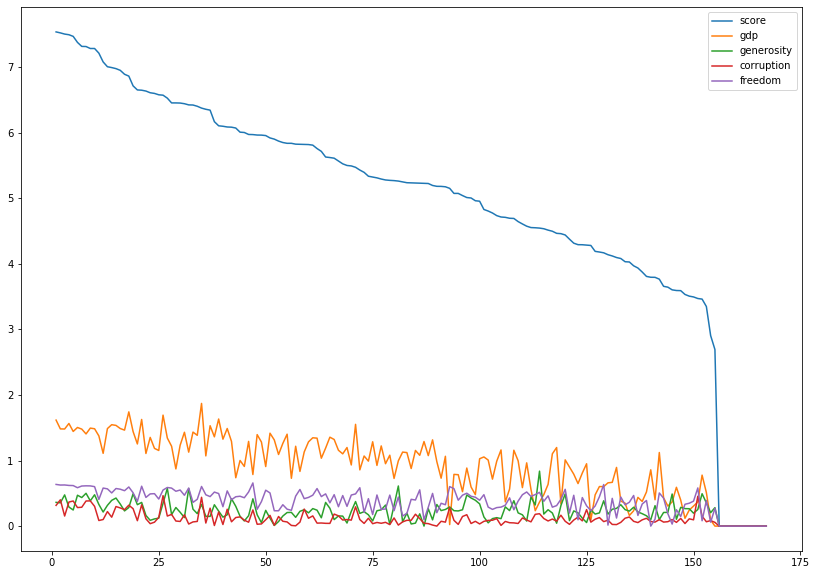

In [4]:
plt.figure(figsize=(14, 10))
plt.plot(df['rank'], df['score'], label='score')
plt.plot(df['rank'], df['gdp'], label='gdp')
plt.plot(df['rank'], df['generosity'], label='generosity')
plt.plot(df['rank'], df['corruption'], label='corruption')
plt.plot(df['rank'], df['freedom'], label='freedom')
plt.legend()

In [5]:
x = df.iloc[:, 3:]
y = df.iloc[:,2]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3, random_state=42)

In [6]:
estimators = {
    'SVR': SVR(gamma='auto', C=1.0, epsilon=0.1),
    'RANSAC': RANSACRegressor(), #Metaestimator
    'HUBER': HuberRegressor(epsilon=1.35)
}

In [7]:
for key, es in estimators.items():
    es.fit(x_train, y_train)
    y_pred = es.predict(x_test)
    print('-'*32)
    print(key)
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"r2_Score: {r2_score(y_pred, y_test)}")

--------------------------------
SVR
MSE: 0.005844139576335231
r2_Score: 0.9973228957799184
--------------------------------
RANSAC
MSE: 1.266660260314361e-19
r2_Score: 1.0
--------------------------------
HUBER
MSE: 5.614148505629625e-10
r2_Score: 0.9999999997475512


## Dataset Beer

In [8]:
df = pd.read_csv('../Datasets/Others/Consumo_cerveja.csv')
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,01/01/2015,"27,3","23,9","32,5",0,0,25.461
1,02/01/2015,"27,02","24,5","33,5",0,0,28.972
2,03/01/2015,"24,82","22,4","29,9",0,1,30.814
3,04/01/2015,"23,98","21,5","28,6","1,2",1,29.799
4,05/01/2015,"23,82",21,"28,3",0,0,28.900


In [9]:
df.dtypes

Data                            object
Temperatura Media (C)           object
Temperatura Minima (C)          object
Temperatura Maxima (C)          object
Precipitacao (mm)               object
Final de Semana                  int64
Consumo de cerveja (litros)    float64
dtype: object

In [10]:
df.isnull().sum()

Data                           0
Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
dtype: int64

In [11]:
df = df.drop(['Data'], 1)
df.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,"27,3","23,9","32,5",0,0,25.461
1,"27,02","24,5","33,5",0,0,28.972
2,"24,82","22,4","29,9",0,1,30.814
3,"23,98","21,5","28,6","1,2",1,29.799
4,"23,82",21,"28,3",0,0,28.900


In [12]:
df.columns

Index(['Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)'],
      dtype='object')

In [13]:
df['Temperatura Media (C)'] = df['Temperatura Media (C)'].str.replace(',','.').astype(float)
df['Temperatura Minima (C)'] = df['Temperatura Minima (C)'].str.replace(',','.').astype(float)
df['Temperatura Maxima (C)'] = df['Temperatura Maxima (C)'].str.replace(',','.').astype(float)
df['Precipitacao (mm)'] = df['Precipitacao (mm)'].str.replace(',','.').astype(float)
df.dtypes

Temperatura Media (C)          float64
Temperatura Minima (C)         float64
Temperatura Maxima (C)         float64
Precipitacao (mm)              float64
Final de Semana                  int64
Consumo de cerveja (litros)    float64
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
Temperatura Media (C)          365 non-null float64
Temperatura Minima (C)         365 non-null float64
Temperatura Maxima (C)         365 non-null float64
Precipitacao (mm)              365 non-null float64
Final de Semana                365 non-null int64
Consumo de cerveja (litros)    365 non-null float64
dtypes: float64(5), int64(1)
memory usage: 17.2 KB


In [15]:
df.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,27.30,23.9,32.5,0.0,0,25.461
1,27.02,24.5,33.5,0.0,0,28.972
2,24.82,22.4,29.9,0.0,1,30.814
3,23.98,21.5,28.6,1.2,1,29.799
4,23.82,21.0,28.3,0.0,0,28.900


In [16]:
x = df.drop(['Consumo de cerveja (litros)'],1)
y = df['Consumo de cerveja (litros)']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [17]:
for key, es in estimators.items():
    es.fit(x_train, y_train)
    y_pred = es.predict(x_test)
    print('-'*32)
    print(key)
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"r2_Score: {r2_score(y_pred, y_test)}")

--------------------------------
SVR
MSE: 12.189507769485978
r2_Score: -2.726174663703026
--------------------------------
RANSAC
MSE: 5.324035055681788
r2_Score: 0.6318428705082734
--------------------------------
HUBER
MSE: 5.977940784759861
r2_Score: 0.5650872046533102


Very bad just 58.69%

In [18]:
x = df[['Temperatura Media (C)', 'Precipitacao (mm)', 'Final de Semana']]
y = df['Consumo de cerveja (litros)']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [19]:
for key, es in estimators.items():
    es.fit(x_train, y_train)
    y_pred = es.predict(x_test)
    print('-'*32)
    print(key)
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"r2_Score: {r2_score(y_pred, y_test)}")

--------------------------------
SVR
MSE: 14.130338447374136
r2_Score: -1.8268692667414617
--------------------------------
RANSAC
MSE: 8.997253324323426
r2_Score: 0.5401366354912489
--------------------------------
HUBER
MSE: 7.680925785326326
r2_Score: 0.3718680005956734


worst 44.80%

In [20]:
x = df[['Temperatura Maxima (C)']]
y = df['Consumo de cerveja (litros)']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

for key, es in estimators.items():
    es.fit(x_train, y_train)
    y_pred = es.predict(x_test)
    print('-'*32)
    print(key)
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"r2_Score: {r2_score(y_pred, y_test)}")

--------------------------------
SVR
MSE: 12.488229387671591
r2_Score: -1.84916044454698
--------------------------------
RANSAC
MSE: 11.540994939765561
r2_Score: -0.49607979524581736
--------------------------------
HUBER
MSE: 11.71160441614504
r2_Score: -0.5838005422637951


this model is useless, but why? 

In [21]:
df.groupby(['Final de Semana']).mean()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Consumo de cerveja (litros)
Final de Semana,,,,,
0,21.328199,17.567433,26.721073,5.184291,23.998222
1,20.970769,17.195192,26.336538,5.227885,28.922721


In [22]:
df.groupby(['Final de Semana']).std()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Consumo de cerveja (litros)
Final de Semana,,,,,
0,3.165052,2.765010,4.292047,12.068447,3.787527
1,3.218723,2.971234,4.389087,13.315211,3.830191


Conclusion:
More data needed 

## Dataset FuelConsumption

In [23]:
df = pd.read_csv('../Datasets/Others/FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [24]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [25]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [26]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [27]:
df = df[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']]
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


In [28]:
x = df.drop(['CO2EMISSIONS'], 1)
y = df['CO2EMISSIONS']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [29]:
for key, es in estimators.items():
    es.fit(x_train, y_train)
    y_pred = es.predict(x_test)
    print('-'*32)
    print(key)
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"r2_Score: {r2_score(y_pred, y_test)}")

--------------------------------
SVR
MSE: 1707.8885023265268
r2_Score: -0.5911202727865763
--------------------------------
RANSAC
MSE: 1627.3439033226296
r2_Score: 0.7511336834984094
--------------------------------
HUBER
MSE: 1569.5382944947078
r2_Score: 0.759417695728603


## Dataset Mall Customer

In [30]:
df = pd.read_csv('../Datasets/Others/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [31]:
df.shape

(200, 5)

In [32]:
le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [33]:
df = df.drop(['CustomerID'], 1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [34]:
x = df.drop(['Spending Score (1-100)'], 1)
y = df['Spending Score (1-100)']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [35]:
for key, es in estimators.items():
    es.fit(x_train, y_train)
    y_pred = es.predict(x_test)
    print('-'*32)
    print(key)
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"r2_Score: {r2_score(y_pred, y_test)}")

--------------------------------
SVR
MSE: 708.2638417604346
r2_Score: -3092.280306567334
--------------------------------
RANSAC
MSE: 768.9853369537032
r2_Score: -2.6827270293877863
--------------------------------
HUBER
MSE: 719.8985133144677
r2_Score: -7.545221865043132


## Dataset Boston

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 10,000 USD
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV (target) - Median value of owner-occupied homes in 1000's (USD)

In [36]:
boston = datasets.load_boston()

df = pd.DataFrame(boston.data, columns= boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [37]:
x = df
y = boston.target

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [38]:
for key, es in estimators.items():
    es.fit(x_train, y_train)
    y_pred = es.predict(x_test)
    print('-'*32)
    print(key)
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"r2_Score: {r2_score(y_pred, y_test)}")

--------------------------------
SVR
MSE: 75.90846515413112
r2_Score: -476.3966447838732
--------------------------------
RANSAC
MSE: 28.23750014725544
r2_Score: 0.4718454697587823
--------------------------------
HUBER
MSE: 19.49862770209375
r2_Score: 0.7152263925791216


## Dataset Automovil 

1. symboling:                -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses:        continuous from 65 to 256.
3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,
                           isuzu, jaguar, mazda, mercedes-benz, mercury,
                           mitsubishi, nissan, peugot, plymouth, porsche,
                           renault, saab, subaru, toyota, volkswagen, volvo
4. fuel-type:                diesel, gas.
5. aspiration:               std, turbo.
6. num-of-doors:             four, two.
7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels:             4wd, fwd, rwd.
9. engine-location:          front, rear.
10. wheel-base:               continuous from 86.6 120.9.
11. length:                   continuous from 141.1 to 208.1.
12. width:                    continuous from 60.3 to 72.3.
13. height:                   continuous from 47.8 to 59.8.
14. curb-weight:              continuous from 1488 to 4066.
15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
17. engine-size:              continuous from 61 to 326.
18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore:                     continuous from 2.54 to 3.94.
20. stroke:                   continuous from 2.07 to 4.17.
21. compression-ratio:        continuous from 7 to 23.
22. horsepower:               continuous from 48 to 288.
23. peak-rpm:                 continuous from 4150 to 6600.
24. city-mpg:                 continuous from 13 to 49.
25. highway-mpg:              continuous from 16 to 54.
26. price:                    continuous from 5118 to 45400.

In [39]:
cols = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style',
        'drive-wheels','engine-location','wheel-base', 'length', 'width','height','curb-weight', 'engine-type',
        'num-of-cylinders','engine-size', 'fuel-system', 'bore','stroke', 'compression-ratio',
        'horsepower','peak-rpm', 'city-mpg','highway-mpg', 'price']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', names=cols, sep=',')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [40]:
df = df.apply(lambda x: x.replace('?', np.nan))
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [41]:
df = df.drop(['symboling','normalized-losses' ], 1)
df.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [42]:
df.columns

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [43]:
df = df[['num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']]

df.head()

,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [44]:
df.isna().sum()

num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [45]:
df.isnull().sum()

num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [46]:
print('before ',df.shape )
df = df.dropna()
print('after ', df.shape )

before  (205, 21)
after  (193, 21)


In [47]:
df['num-of-cylinders'].replace({'eight':8, 'five':5, 'four':4, 
                                'six':6, 'three':3, 'twelve':12, 
                                'two':2}, inplace=True)
df['num-of-doors'].replace({'four':4,'two':2}, inplace=True)

df.head()

,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [48]:
df.columns

Index(['num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [49]:
le_bs = LabelEncoder() # body style
le_dw = LabelEncoder() # drive wheels
le_el = LabelEncoder() # engine location
le_et = LabelEncoder() # engine type
le_fs = LabelEncoder() # fuel system 

df['body-style'] = le_bs.fit_transform(df['body-style'])
df['drive-wheels'] = le_dw.fit_transform(df['drive-wheels'])
df['engine-location'] = le_el.fit_transform(df['engine-location'])
df['engine-type'] = le_et.fit_transform(df['engine-type'])
df['fuel-system'] = le_fs.fit_transform(df['fuel-system'])

df.head()


,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,...,130,4,3.47,2.68,9.0,111,5000,21,27,13495
1,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,...,130,4,3.47,2.68,9.0,111,5000,21,27,16500
2,2,2,2,0,94.5,171.2,65.5,52.4,2823,4,...,152,4,2.68,3.47,9.0,154,5000,19,26,16500
3,4,3,1,0,99.8,176.6,66.2,54.3,2337,2,...,109,4,3.19,3.40,10.0,102,5500,24,30,13950
4,4,3,0,0,99.4,176.6,66.4,54.3,2824,2,...,136,4,3.19,3.40,8.0,115,5500,18,22,17450


In [50]:
x = df.drop(['price'], 1)
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)


In [51]:
for key, es in estimators.items():
    es.fit(x_train, y_train)
    y_pred = es.predict(x_test)
    print('-'*32)
    print(key)
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"r2_Score: {r2_score(y_pred, y_test)}")

--------------------------------
SVR
MSE: 73161949.27792457
r2_Score: -718676225.8201427
--------------------------------
RANSAC
MSE: 8242569.091247072
r2_Score: 0.8585202711669124
--------------------------------
HUBER
MSE: 8831095.853046207
r2_Score: 0.8361593191151169


In [52]:
# Normalization

x = df.drop(['price'], 1)
y = df['price']
x = StandardScaler().fit_transform(x) # Normalization


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)


In [53]:
for key, es in estimators.items():
    es.fit(x_train, y_train)
    y_pred = es.predict(x_test)
    print('-'*32)
    print(key)
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"r2_Score: {r2_score(y_pred, y_test)}")

--------------------------------
SVR
MSE: 103881129.68060786
r2_Score: -378863.73836275813
--------------------------------
RANSAC
MSE: 16324028.3836736
r2_Score: 0.7617356131169395
--------------------------------
HUBER
MSE: 11037070.70570508
r2_Score: 0.832389546531094


In [54]:
# Prediction and validation
hubber = HuberRegressor(epsilon=1.35).fit(x_train,y_train)
p = x[0]
print('x = ', p)
print('Hubber prediction = ', hubber.predict([p]))
y_pred = y[0]
print('y of x (Real) = ', y_pred) 

x =  [-1.17588947 -3.02069366  1.22412934 -0.12565617 -1.68237907 -0.44402424
 -0.84126272 -2.12259761 -0.02571274 -2.49872139 -0.411247    0.04521533
  0.86657577  0.51302731 -1.80818563 -0.28827253  0.19856866 -0.21335937
 -0.67905347 -0.55705817]
Hubber prediction =  [15446.46478275]
y of x (Real) =  13495


In [55]:
# Prediction and validation
hubber = HuberRegressor(epsilon=1.35).fit(x_train,y_train)
p = x[2]
print('x = ', p)
print('Hubber prediction = ', hubber.predict([p]))
y_pred = y[2]
print('y of x (Real) = ', y_pred) 

x =  [-1.17588947 -0.71637004  1.22412934 -0.12565617 -0.72091104 -0.25119466
 -0.18467928 -0.61541231  0.497764    2.43481547  1.54852264  0.57555862
  0.86657577 -2.39482676  0.70291796 -0.28827253  1.3342829  -0.21335937
 -0.99296322 -0.70413372]
Hubber prediction =  [17160.39195238]
y of x (Real) =  16500


In [56]:
hubber.coef_

array([ 4.06635427e+02, -4.80273868e+02,  3.95629996e+00,  1.43843092e+03,
        1.00572104e+02, -5.59947696e+02,  1.66304117e+03,  2.97005727e+02,
        1.16291387e+03, -4.96708380e+02, -7.27462839e+02,  6.10493464e+03,
        1.82521195e+02, -1.49738867e+03, -1.30576089e+03,  5.15034911e+02,
        1.13495876e+02,  4.59099638e+02, -1.95861607e+02, -3.83434204e+02])

In [57]:
df.columns

Index(['num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [58]:
s = list(zip(hubber.coef_, df.columns))
s

[(406.63542695955016, 'num-of-doors'),
 (-480.2738678114309, 'body-style'),
 (3.9562999602748423, 'drive-wheels'),
 (1438.4309154391813, 'engine-location'),
 (100.57210426908435, 'wheel-base'),
 (-559.9476957164039, 'length'),
 (1663.0411719561823, 'width'),
 (297.00572744009014, 'height'),
 (1162.9138704519034, 'curb-weight'),
 (-496.70837968733207, 'engine-type'),
 (-727.4628393904709, 'num-of-cylinders'),
 (6104.934640227275, 'engine-size'),
 (182.5211954744351, 'fuel-system'),
 (-1497.3886712360104, 'bore'),
 (-1305.7608883923558, 'stroke'),
 (515.0349110321825, 'compression-ratio'),
 (113.49587637994318, 'horsepower'),
 (459.09963812728387, 'peak-rpm'),
 (-195.8616072131865, 'city-mpg'),
 (-383.43420394434577, 'highway-mpg')]

In [59]:
# Normalization

x = df.drop(['price','engine-location'], 1)
y = df['price']
x = StandardScaler().fit_transform(x) # Normalization


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

for key, es in estimators.items():
    es.fit(x_train, y_train)
    y_pred = es.predict(x_test)
    print('-'*32)
    print(key)
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"r2_Score: {r2_score(y_pred, y_test)}")

--------------------------------
SVR
MSE: 113828172.34055492
r2_Score: -607608.8844688442
--------------------------------
RANSAC
MSE: 94936927.60944308
r2_Score: 0.6014515763720683
--------------------------------
HUBER
MSE: 22511120.113377016
r2_Score: 0.7676652472862695
